In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

from matplotlib import pyplot as plot

In [2]:
df = pd.read_csv('top_1000.csv')

df.head() 

,SrNo,Title,Title_Synonym,Title_Japanese,Status,Volumns,Chapters,Publishing,Rank,Score,Scored_by,Popularity,Memebers,Favorites,Synopsis,Publish_period,Genre
0,0,Berserk,Berserk,ベルセルク,Publishing,unkown,unkown,True,1,9.39,201756,2,427894,80308,"Guts, a former mercenary now known as the ""Bla...","Aug 25, 1989 to present","'Action', 'Adventure', 'Demons', 'Drama', 'Fan..."
1,1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,unkown,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,Finished,24.0,96.0,False,2,9.23,94427,29,160782,27459,"In the American Old West, the world's greatest...","Jan 19, 2004 to Apr 19, 2011","'Action', 'Adventure', 'Mystery', 'Historical'..."
2,2,One Piece,One Piece,ONE PIECE,Publishing,unkown,unkown,True,3,9.15,249936,3,410522,82310,"Gol D. Roger, a man referred to as the ""Pirate...","Jul 22, 1997 to present","'Action', 'Adventure', 'Comedy', 'Fantasy', 'S..."
3,3,Vagabond,Vagabond,バガボンド,On Hiatus,37.0,327.0,False,4,9.13,72613,19,211345,21596,"In 16th century Japan, Shinmen Takezou is a wi...","Sep 3, 1998 to May 21, 2015","'Action', 'Adventure', 'Drama', 'Historical', ..."
4,4,Monster,Monster,MONSTER,Finished,18.0,162.0,False,5,9.10,57801,33,148764,13049,"Kenzou Tenma, a renowned Japanese neurosurgeon...","Dec 5, 1994 to Dec 20, 2001","'Mystery', 'Drama', 'Psychological', 'Seinen'"


# Preprocessing

In [3]:
df.drop(['SrNo', 'Title_Synonym', 'Title_Japanese', 'Synopsis', 'Publish_period'], axis=1, inplace=True)

In [4]:
df.head()

,Title,Status,Volumns,Chapters,Publishing,Rank,Score,Scored_by,Popularity,Memebers,Favorites,Genre
0,Berserk,Publishing,unkown,unkown,True,1,9.39,201756,2,427894,80308,"'Action', 'Adventure', 'Demons', 'Drama', 'Fan..."
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,Finished,24.0,96.0,False,2,9.23,94427,29,160782,27459,"'Action', 'Adventure', 'Mystery', 'Historical'..."
2,One Piece,Publishing,unkown,unkown,True,3,9.15,249936,3,410522,82310,"'Action', 'Adventure', 'Comedy', 'Fantasy', 'S..."
3,Vagabond,On Hiatus,37.0,327.0,False,4,9.13,72613,19,211345,21596,"'Action', 'Adventure', 'Drama', 'Historical', ..."
4,Monster,Finished,18.0,162.0,False,5,9.10,57801,33,148764,13049,"'Mystery', 'Drama', 'Psychological', 'Seinen'"


# Data Analysis and Visualization

In [5]:
# Get count of genre used in all mangas
genre_count = {}

for val in df['Genre']:

    for gen in val.split():
        cleaned_genre = gen[1:-2]
        genre_count[cleaned_genre] = genre_count.get(cleaned_genre, 0) + 1

In [6]:
genre_count

{'Action': 301,
 'Adventure': 152,
 'Demons': 26,
 'Drama': 463,
 'Fantasy': 211,
 'Horror': 75,
 'Supernatural': 71,
 'Military': 8,
 'Psychological': 57,
 'Seine': 203,
 'Mystery': 131,
 'Historical': 82,
 'Shounen': 149,
 'Comedy': 340,
 'Sup': 32,
 'owe': 16,
 'Samurai': 10,
 'Militar': 20,
 'Sli': 170,
 '': 193,
 'ife': 68,
 'School': 242,
 'Sport': 28,
 'Romance': 305,
 'Vampire': 18,
 'Supernatura': 169,
 'Sci-Fi': 94,
 'Sports': 14,
 'if': 102,
 'Ecchi': 27,
 'Shoune': 87,
 'Game': 26,
 'Fantas': 34,
 'Psychologica': 64,
 'Schoo': 16,
 'Shouj': 84,
 'Sci-F': 16,
 'Space': 5,
 'Thrille': 13,
 'Magic': 51,
 'Parody': 7,
 'ower': 16,
 'Music': 13,
 'Shoujo': 83,
 'Shou': 12,
 'Romanc': 24,
 'Mecha': 13,
 'Shoun': 43,
 'i': 32,
 'Historica': 4,
 'Jose': 28,
 'Harem': 16,
 'Gend': 20,
 'ende': 20,
 'Dram': 5,
 'Marti': 31,
 'rts': 25,
 'Kids': 3,
 'Police': 5,
 'Gam': 4,
 'rt': 6,
 'Myster': 1,
 'Seinen': 2,
 'Josei': 3,
 'Magi': 7,
 'Polic': 5,
 'Vampir': 3,
 'Cars': 1,
 'Dementia'

<BarContainer object of 75 artists>

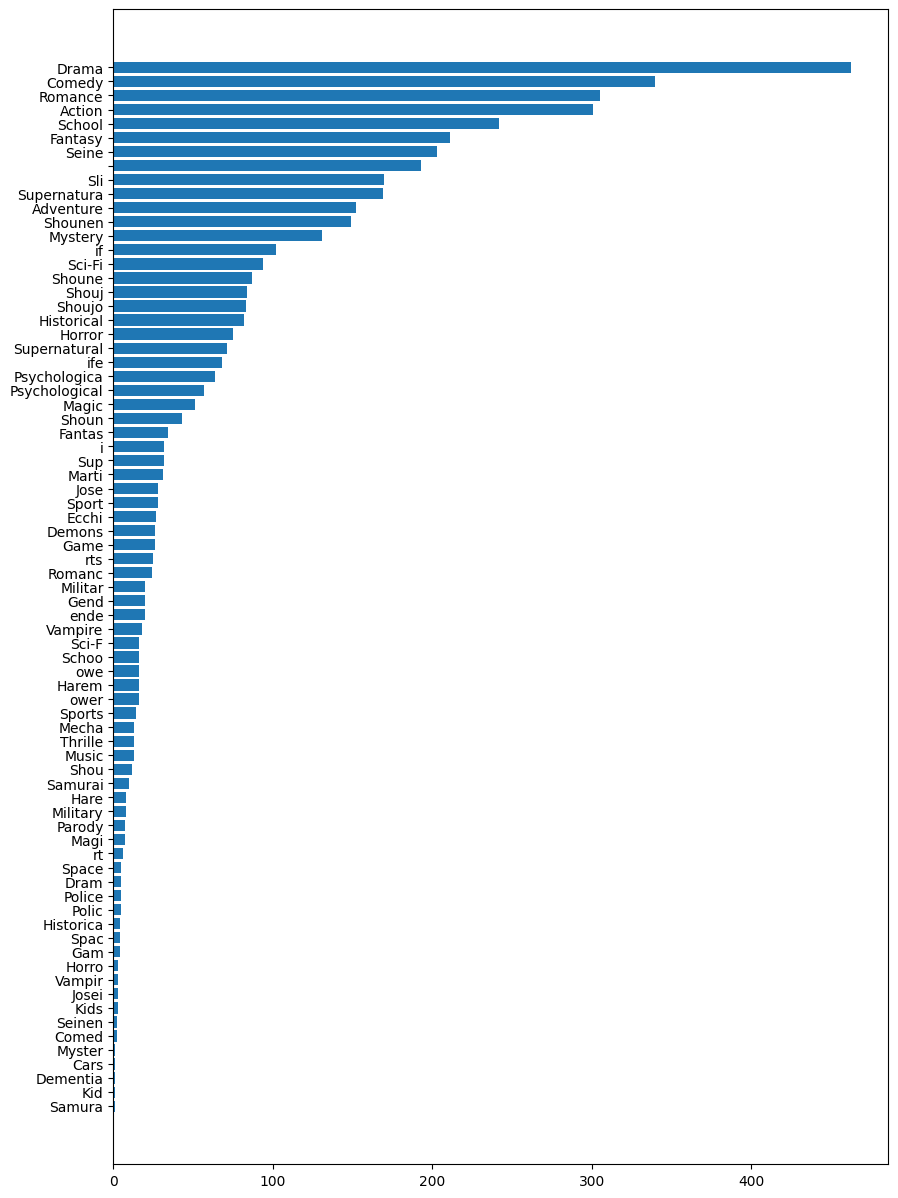

In [7]:
plot.style.use('default')
data = [(genre, genre_count[genre]) for genre in genre_count]
data = pd.DataFrame(data=data, columns=['Genre', 'Count'])
data.sort_values(by='Count', inplace=True, ascending=True)

plot.figure(figsize=(10, 15))
plot.barh(y=data['Genre'], width=data['Count'])

Drama and Comedy are the most published mangas

<AxesSubplot:xlabel='Popularity', ylabel='Title'>

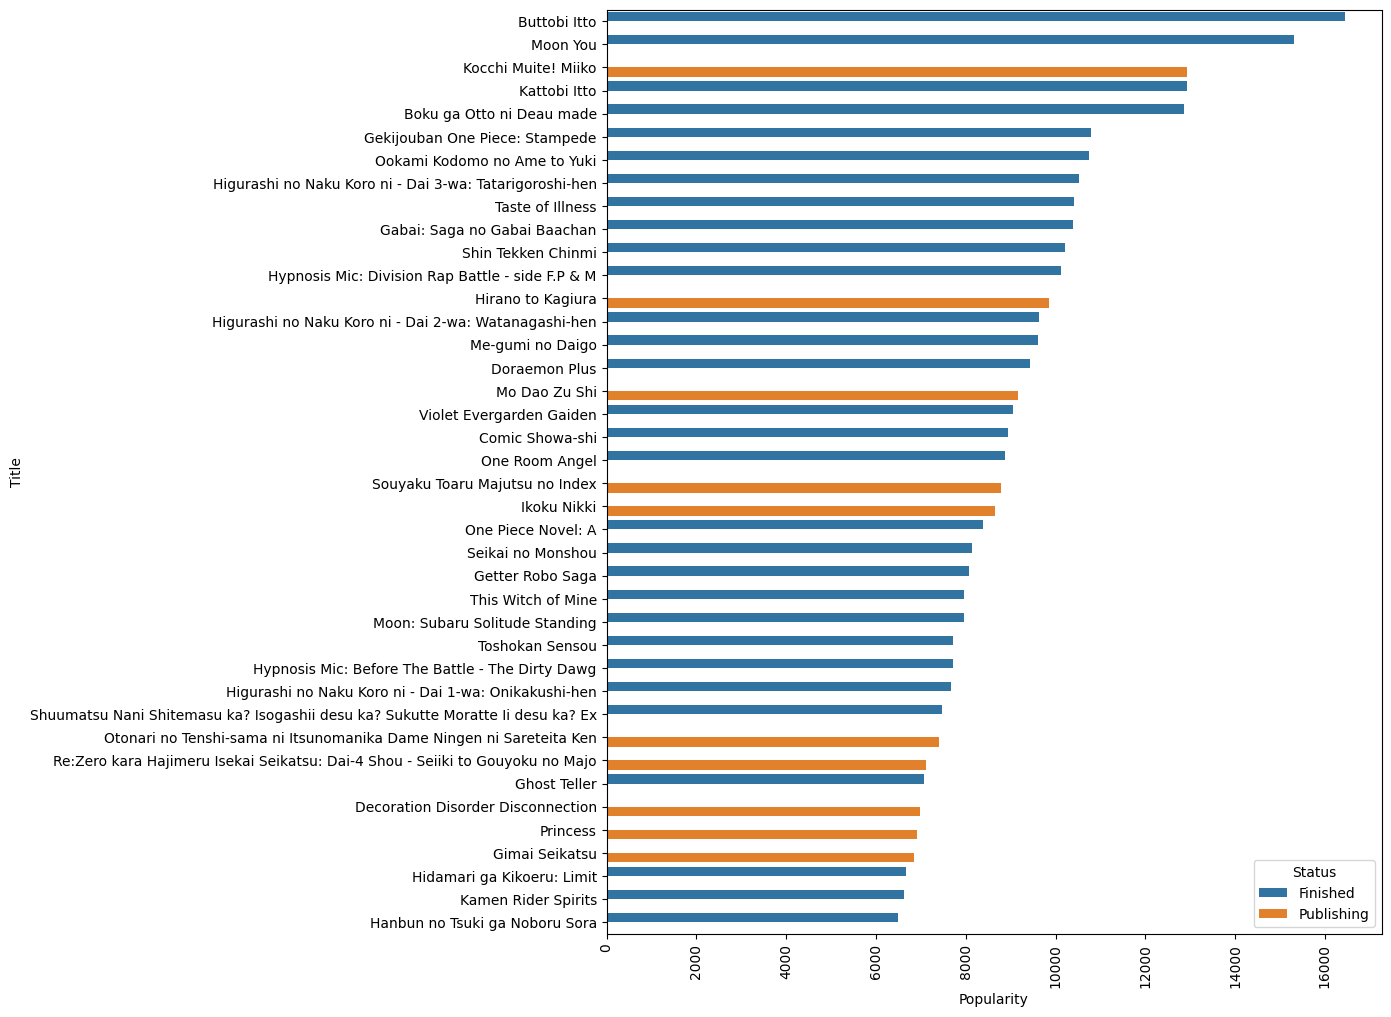

In [8]:
data = df.sort_values(by='Popularity', ascending=False).head(40)

plot.figure(figsize=(10, 12))
plot.xticks(rotation=90)
sb.barplot(data=data, y='Title', x='Popularity', hue='Status') 

Here we can see the top 40 popular mangas 

~~Are they really popular? I haven't heard of any of them~~

<AxesSubplot:xlabel='Score', ylabel='Title'>

C:\Users\Rushikesh\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 21325 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\Rushikesh\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Rushikesh\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 21325 missing from current font.
  font.set_text(s, 0, flags=flags)


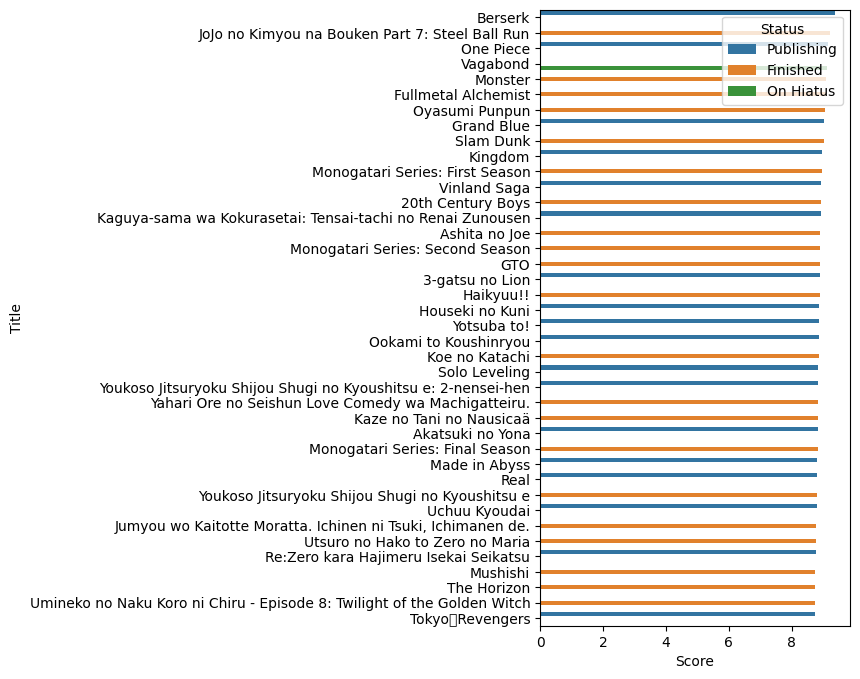

In [9]:
data = df.sort_values(by='Score', ascending=False).head(40)

plot.figure(figsize=(4, 8))
sb.barplot(data=data, y='Title', x='Score', hue='Status') 

Now I know what to binge this weekend!

## JoJo's Bizzare Adventure

In [22]:
def contains(column, substring):
    data = []
    for manga in df[column]:
        data.append(substring in manga)
    return np.array(data, dtype='bool')


In [23]:
jojo_df = df[contains('Title', 'JoJo')]
jojo_df 

,Title,Status,Volumns,Chapters,Publishing,Rank,Score,Scored_by,Popularity,Memebers,Favorites,Genre
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,Finished,24.0,96.0,False,2,9.23,94427,29,160782,27459,"'Action', 'Adventure', 'Mystery', 'Historical'..."
83,JoJo no Kimyou na Bouken Part 4: Diamond wa Ku...,Finished,18.0,174.0,False,84,8.58,45726,127,76201,5735,"'Action', 'Shounen', 'Supernatural'"
138,JoJo no Kimyou na Bouken Part 8: JoJolion,Publishing,unkown,unkown,True,136,8.46,33784,87,91195,4584,"'Action', 'Adventure', 'Mystery', 'Supernatura..."
391,JoJo no Kimyou na Bouken Part 2: Sentou Chouryuu,Finished,7.0,69.0,False,394,8.19,46957,126,76360,2884,"'Action', 'Adventure', 'Historical', 'Shounen'..."
392,JoJo no Kimyou na Bouken Part 6: Stone Ocean,Finished,17.0,158.0,False,398,8.19,92613,39,145352,9373,"'Action', 'Adventure', 'Shounen'"
410,JoJo no Kimyou na Bouken Part 5: Ougon no Kaze,Finished,17.0,155.0,False,414,8.18,54720,99,86017,5082,"'Action', 'Adventure', 'Shounen'"
433,Hajishirazu no Purple Haze: JoJo no Kimyou na ...,Finished,1.0,8.0,False,434,8.16,3837,1382,10084,303,"'Action', 'Adventure', 'Shounen', 'Super Power'"
499,JoJo no Kimyou na Bouken Part 3: Stardust Crus...,Finished,16.0,152.0,False,498,8.11,42409,137,71325,2877,"'Action', 'Adventure', 'Shounen', 'Supernatural'"


<AxesSubplot:xlabel='Title', ylabel='Score'>

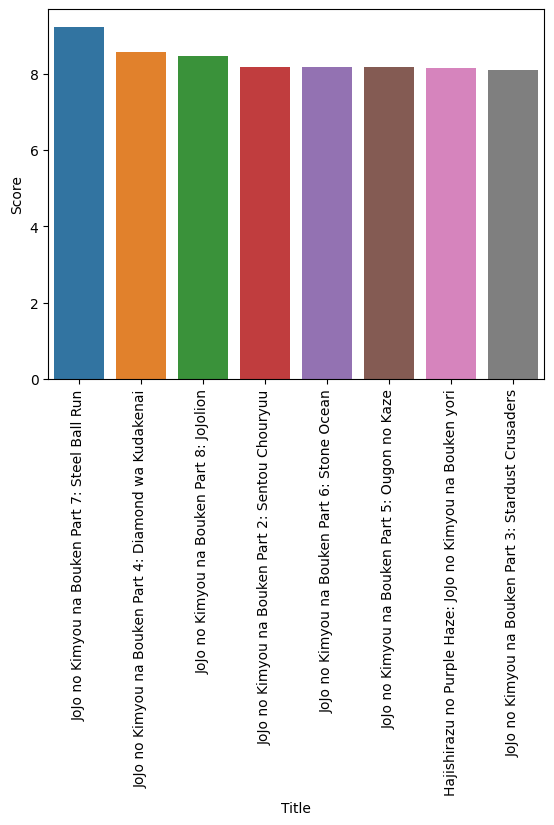

In [29]:
plot.xticks(rotation=90)
sb.barplot(data=jojo_df, y='Score', x='Title') 
